In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

# 탐색적 데이터 분석 EDA

In [2]:
train = pd.read_csv('bike-sharing-demand/train.csv', parse_dates=['datetime'])
# parse_dates = ['datetime'] datetime 행을 datetime 형식으로 받아들임, 날짜 형식으로
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
train.describe()
train.temp.describe() 
# 50% 의 값이 median 값, mean 값과 비교하면서 이상치가 어느정도 있는지 확인할 수 있음
# 여기에서는 이상치가 별로 없어 보이는 것으로 판단할 수 있다.

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [4]:
train.isnull().sum() # 결측값 없음

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

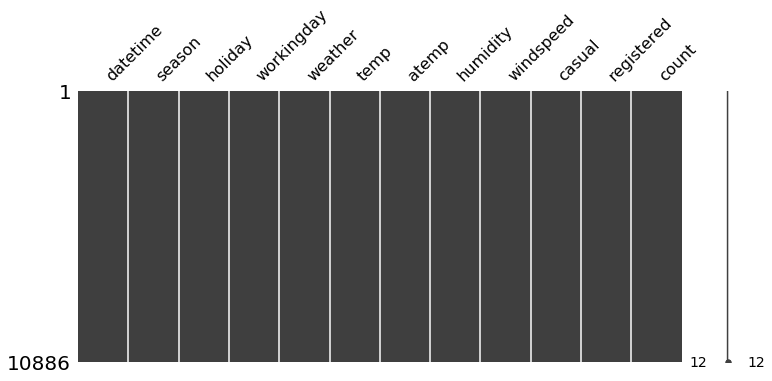

In [5]:
import missingno as msno
msno.matrix(train, figsize = (12,5))
# 결측치 확인, 결측값의 위치를 확인할 수 있음

In [6]:
train.datetime.dt.year
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
# train['minute'] = train['datetime'].dt.minute # 모두 00 이므로 필요없음
# train['second'] = train['datetime'].dt.second
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22


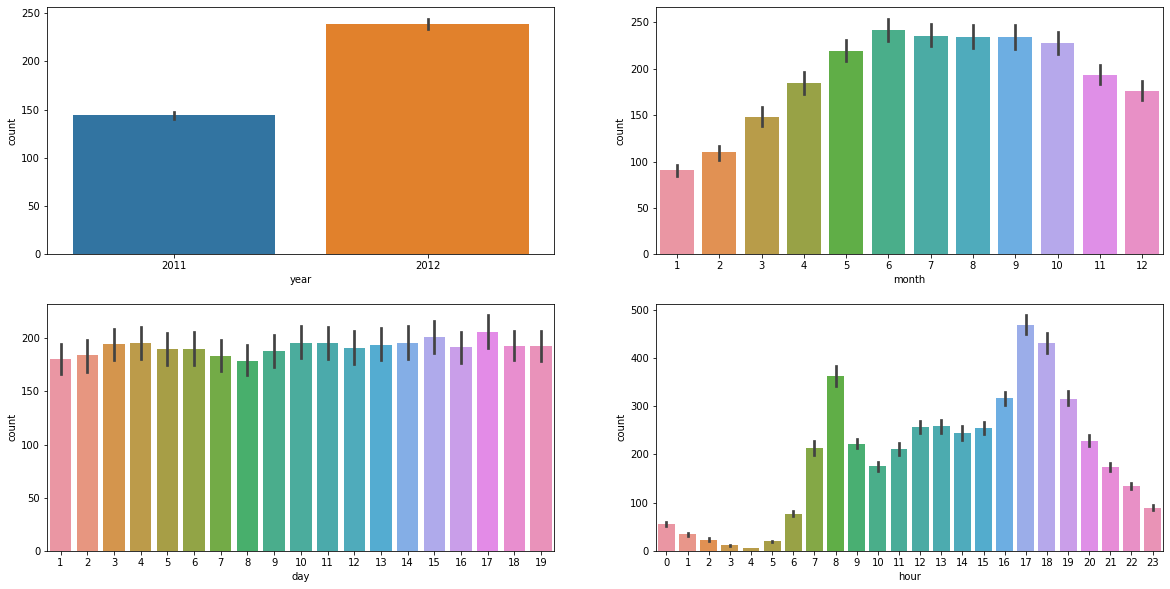

In [7]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(20,10)
sns.barplot(data=train,x='year' ,y='count',ax=ax1)
sns.barplot(data=train,x='month' ,y='count',ax=ax2)
sns.barplot(data=train,x='day' ,y='count',ax=ax3)
sns.barplot(data=train,x='hour' ,y='count',ax=ax4)
# sns.barplot(data=train,x='minute' ,y='count',ax=ax5)
# sns.barplot(data=train,x='second' ,y='count',ax=ax6)

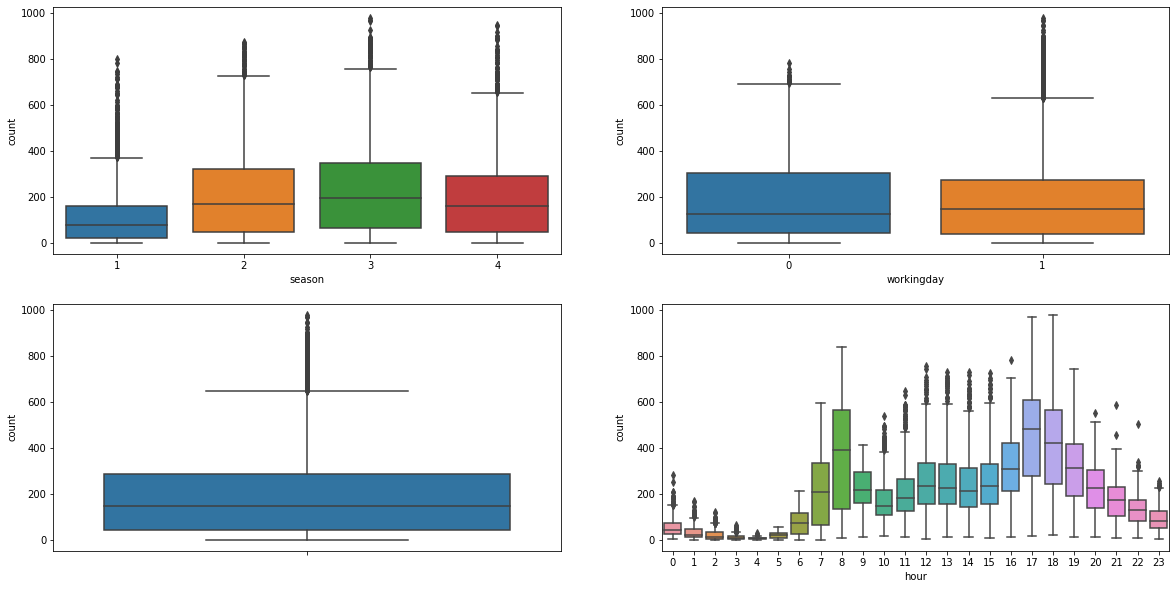

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(20,10)
sns.boxplot(data=train, x='season' ,y='count',ax=axes[0][0])
sns.boxplot(data=train, x='workingday' ,y='count',ax=axes[0][1])
sns.boxplot(data=train, orient='v', y='count',ax=axes[1][0])
sns.boxplot(data=train, x='hour' ,y='count',ax=axes[1][1])


In [9]:
train['dayofweek'] = train['datetime'].dt.dayofweek # 요일을 알 수 있음
train.shape

(10886, 17)

In [10]:
train['dayofweek'].unique()

array([5, 6, 0, 1, 2, 3, 4], dtype=int64)

In [11]:
train['dayofweek'].value_counts().sort_index()

0    1551
1    1539
2    1551
3    1553
4    1529
5    1584
6    1579
Name: dayofweek, dtype: int64

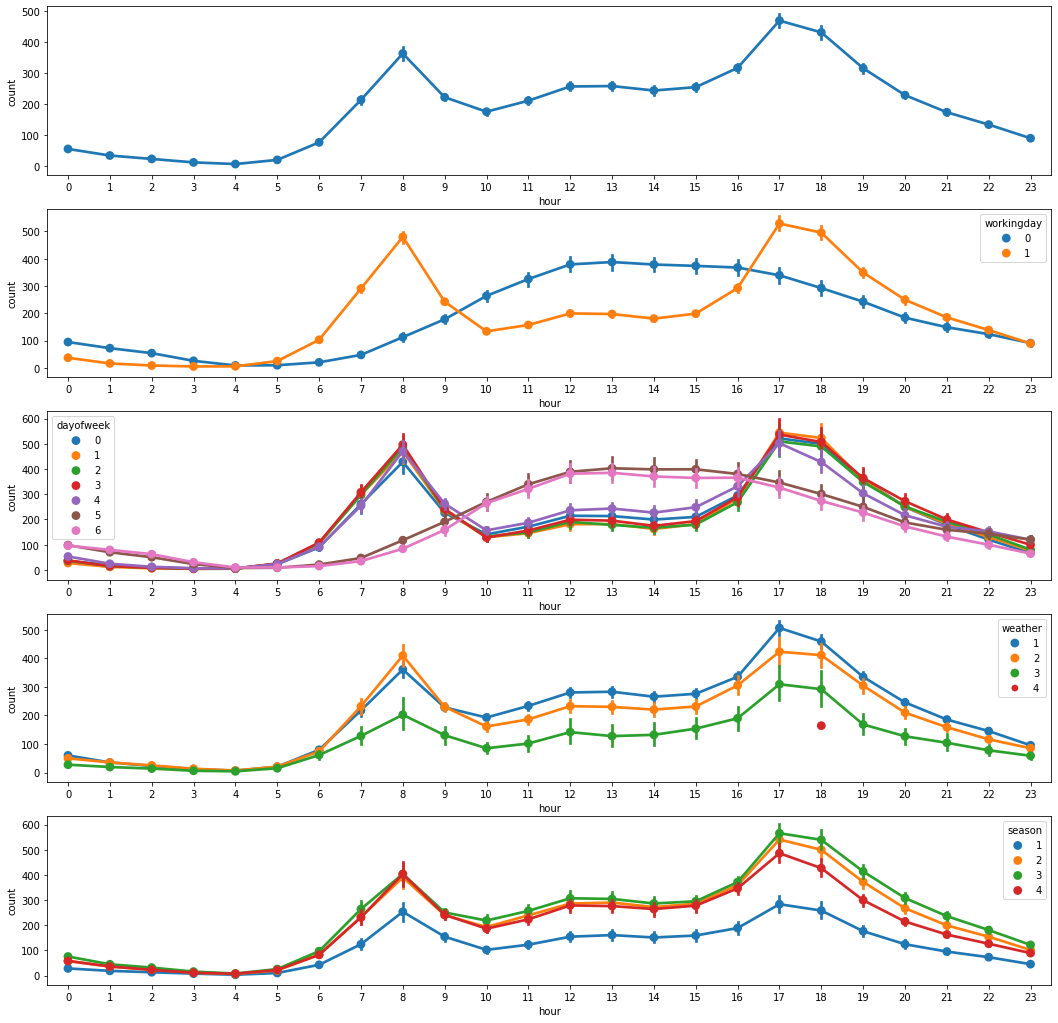

In [12]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5)
fig.set_size_inches(18,18)
sns.pointplot(data=train, x='hour',y='count',ax = ax1)
sns.pointplot(data=train, x='hour',y='count', hue = 'workingday' ,ax = ax2)
# hue = workingday // 근무일로 나누어서 자전거의 count를 알 수 있음
# 2개를 따로 비교할 수 있음
sns.pointplot(data=train, x='hour',y='count', hue = 'dayofweek' ,ax = ax3)
# hue 를 dayofweek로 두어 요일별로 자전거 대여 댓수를 확인할 수 있음
sns.pointplot(data=train, x='hour',y='count', hue = 'weather' ,ax = ax4)
# 날씨에 따른 변화를 확인할 수 있음
sns.pointplot(data=train, x='hour',y='count', hue = 'season' ,ax = ax5)
# 계절에 따른 변화를 확인할 수 있음

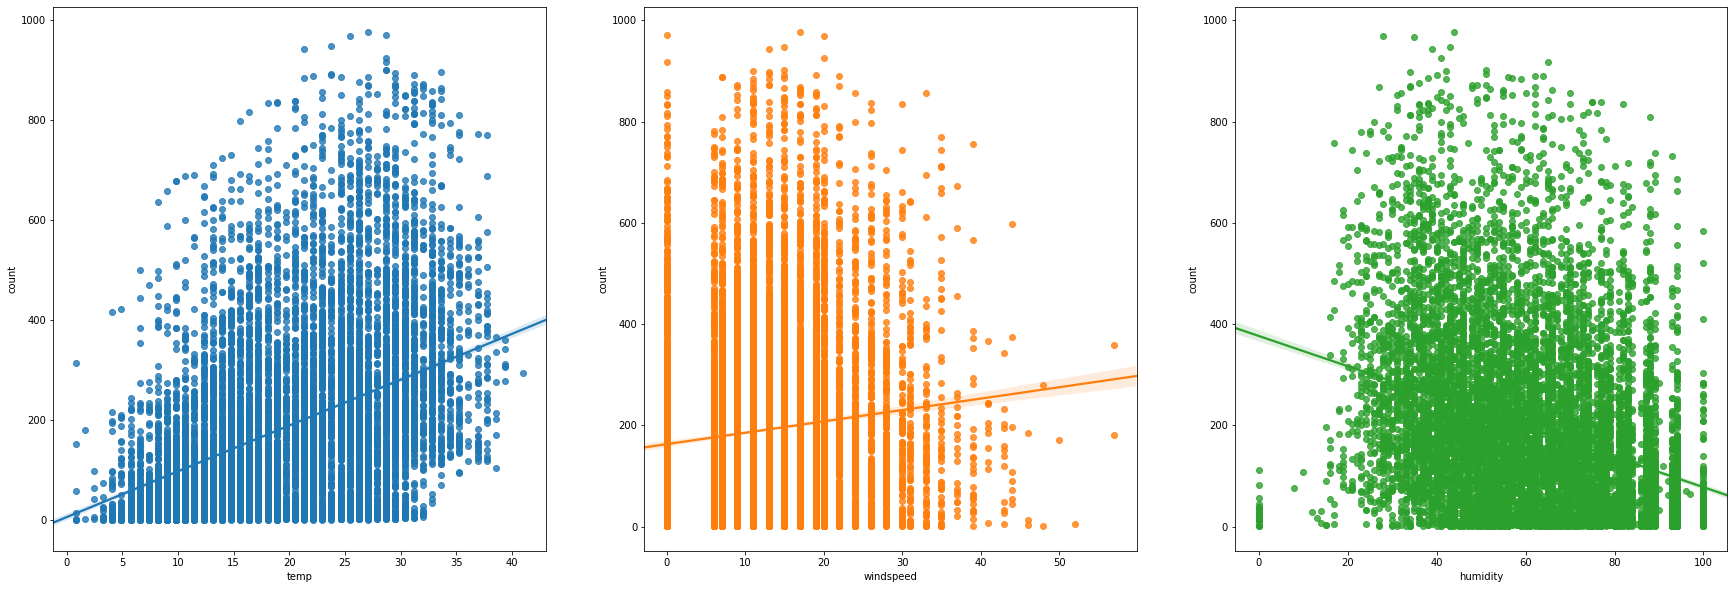

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
fig.set_size_inches(30,10)
sns.regplot(x="temp", y="count", data=train, ax = ax1)
# regplot은 데이터의 선형성을 확인할 수 있다.
sns.regplot(x="windspeed", y="count", data=train, ax = ax2)
# windspeed가 0에 많이 붙어있음.
# 실제 바람이 0인 상태일 수 없으므로 결측치라고 생각할 수 있다.
# 이러한 결측치를 어떻게 처리할 것인지가 핵심 관건이라고 생각할 수 있다.
sns.regplot(x="humidity", y="count", data=train, ax = ax3)
# 습도와는 음의 상관관계를 가지고 있는 것으로 보임


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
year          10886 non-null int64
month         10886 non-null int64
day           10886 non-null int64
hour          10886 non-null int64
dayofweek     10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(13)
memory usage: 1.4 MB


In [15]:
def ym(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)
train['year_month'] = train['datetime'].apply(ym)
train['year_month']

0         2011-1
1         2011-1
2         2011-1
3         2011-1
4         2011-1
          ...   
10881    2012-12
10882    2012-12
10883    2012-12
10884    2012-12
10885    2012-12
Name: year_month, Length: 10886, dtype: object

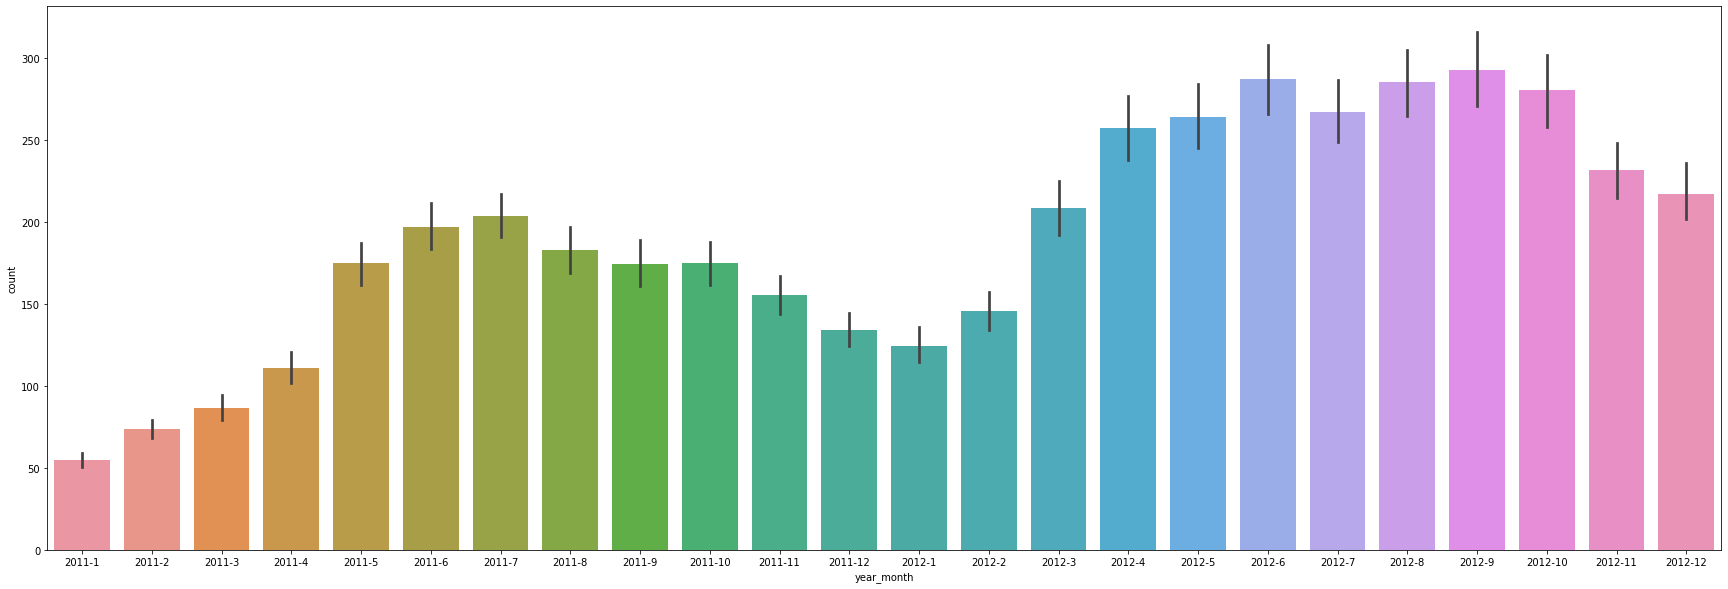

In [16]:
fig, axes = plt.subplots(nrows = 1, ncols=1)
fig.set_size_inches(30,10)
sns.barplot(data=train, x='year_month',y='count',ax=axes)

In [17]:
# 이상치 제거 : outliers 제거

# 평균과의 차이
value_check = np.abs(train['count'] - train['count'].mean()) <= train['count'].std() * 3  # 표준편차 * 3
# 보다 작은 것이 만족하면 실효값, 이상치가 아님

trainWithoutOutliers =  train[value_check]
print(train.shape)
print(trainWithoutOutliers.shape)
# 이상치가 제거됨

(10886, 18)
(10739, 18)


In [18]:
# train 풍속 = 0 인 것을 어떤 값으로 바꿔줄 것인가
# 현재 상황과 가장 유사한 상태를 찾아서 그 떄의 풍속을 넣어주면됨
# 즉 풍속과의 상관성이 높은 애들을찾아 줘야한다.
# 일단은 평균으로 대체하고 향후 공부 예정

# train.loc[train['windspeed']==0, 'windspeed'] = train['windspeed'].mean()
# train['windspeed']

In [26]:
trainWind0 = train.loc[train['windspeed']==0, 'windspeed']
trainWindNot0 = train.loc[train['windspeed']!=0, 'windspeed']
trainWind0.shape

(1313,)

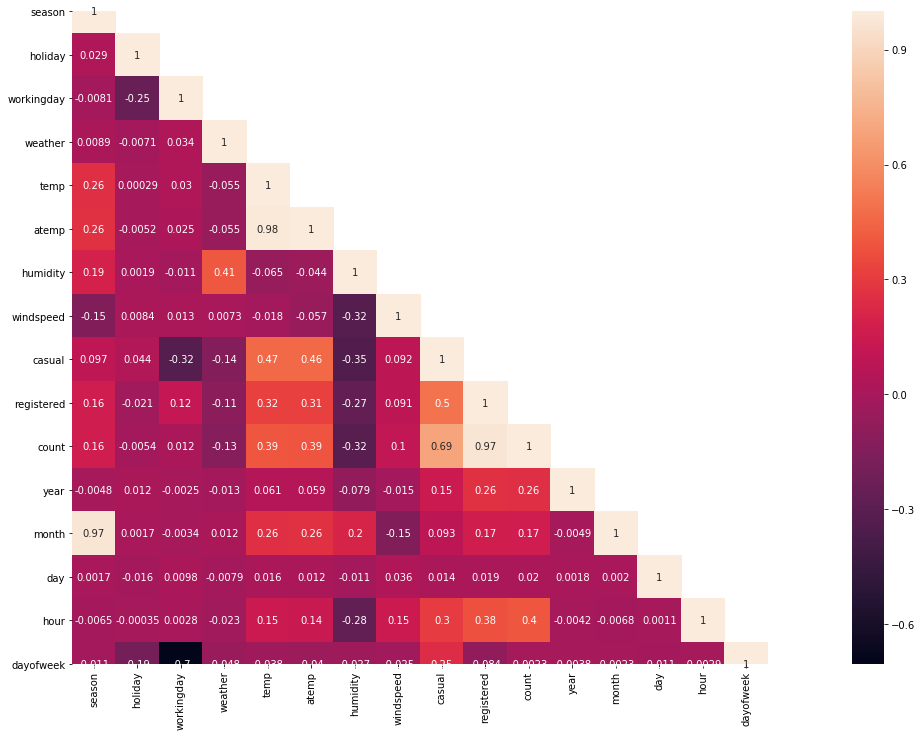

In [27]:
cor_mat= train[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

In [35]:
# cor_mat= train[:].corr()
# mask = np.array(cor_mat)
# mask[np.tril_indices_from(mask)] = False
# fig=plt.gcf()
# fig.set_size_inches(30,12)
# sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)
cor_mat

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,-0.004797,0.971524,0.001729,-0.006546,-0.010553
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.012021,0.001731,-0.015877,-0.000354,-0.191832
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.002482,-0.003394,0.009829,0.002780,-0.704267
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.012548,0.012144,-0.007890,-0.022740,-0.047692
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.061226,0.257589,0.015551,0.145430,-0.038466
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.058540,0.264173,0.011866,0.140343,-0.040235
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.078606,0.204537,-0.011335,-0.278011,-0.026507
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.015221,-0.150192,0.036157,0.146631,-0.024804
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.145241,0.092722,0.014109,0.302045,0.246959
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.264265,0.169451,0.019111,0.380540,-0.084427


In [48]:
# 머신러닝 랜덤포레스트로 풍속 예측
## Decision Tree
'''
## Decision Tree
문제를 해결하는데 있어서 스무고개 같은 느낌
양상블기법
'''
from sklearn.ensemble import RandomForestClassifier

# data의 windspeed값이 0인 데이터를 
#rf를 이용하여 예측한 값으로 대체
def predict_windspeed(data):
    # 풍속 에측에 사용되는 변수
    wCol = ['season','weather','humidity','month','temp','year','atemp']
    dataWind0 = data.loc[data['windspeed']==0]
    dataWindNot0 = data.loc[data['windspeed']!=0]
    
    # 랜덤포레스트 분류기 생성
    rfModel = RandomForestClassifier()
    # 분류기라서 string으로 되어있어야함, dataWindNot0['windspeed']가 문자열이여야함
    dataWindNot0['windspeed']=dataWindNot0['windspeed'].astype('str')
    
    # wCol -> 풍속 -> 모델 완성
    rfModel.fit(dataWindNot0[wCol],dataWindNot0['windspeed']) # 인수 2개 / 입력, 학습할 것
    # 학습한 모델로 풍속 0에 대한 데이터 예측 진행
    preValue = rfModel.predict(dataWind0[wCol])
    
    predictWind0 = dataWind0
    predictWindNot0 = dataWindNot0
    predictWind0['windspeed'] = preValue
    data = predictWindNot0.append(predictWind0)

    print(predictWindNot0.append(predictWind0))
    return data

predict_windspeed(train)

                 datetime  season  holiday  workingday  weather   temp  \
5     2011-01-01 05:00:00       1        0           0        2   9.84   
10    2011-01-01 10:00:00       1        0           0        1  15.58   
11    2011-01-01 11:00:00       1        0           0        1  14.76   
12    2011-01-01 12:00:00       1        0           0        1  17.22   
13    2011-01-01 13:00:00       1        0           0        2  18.86   
...                   ...     ...      ...         ...      ...    ...   
10826 2012-12-17 12:00:00       4        0           1        2  16.40   
10829 2012-12-17 15:00:00       4        0           1        2  17.22   
10846 2012-12-18 08:00:00       4        0           1        1  15.58   
10860 2012-12-18 22:00:00       4        0           1        1  13.94   
10862 2012-12-19 00:00:00       4        0           1        1  12.30   

        atemp  humidity windspeed  casual  registered  count  year  month  \
5      12.880        75    6.0032 

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek,year_month
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,1,5,5,2011-1
10,2011-01-01 10:00:00,1,0,0,1,15.58,19.695,76,16.9979,12,24,36,2011,1,1,10,5,2011-1
11,2011-01-01 11:00:00,1,0,0,1,14.76,16.665,81,19.0012,26,30,56,2011,1,1,11,5,2011-1
12,2011-01-01 12:00:00,1,0,0,1,17.22,21.210,77,19.0012,29,55,84,2011,1,1,12,5,2011-1
13,2011-01-01 13:00:00,1,0,0,2,18.86,22.725,72,19.9995,47,47,94,2011,1,1,13,5,2011-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10826,2012-12-17 12:00:00,4,0,1,2,16.40,20.455,87,8.9981,21,211,232,2012,12,17,12,0,2012-12
10829,2012-12-17 15:00:00,4,0,1,2,17.22,21.210,88,8.9981,15,196,211,2012,12,17,15,0,2012-12
10846,2012-12-18 08:00:00,4,0,1,1,15.58,19.695,94,7.0015,10,652,662,2012,12,18,8,1,2012-12
10860,2012-12-18 22:00:00,4,0,1,1,13.94,16.665,49,11.0014,5,127,132,2012,12,18,22,1,2012-12
